# Aprendizaje evolutivo
#### Maestría en ciencias de los datos y analítica
##### Aprendizaje Automático Avanzado - Eafit 2022-1
---
Presentado por:
* Juan Fernando Gallego
* Jonathan Zapata
* Karla Orozco
* Juan Estaben Chavarria

$\;$

### Resumen
El objetivo de este trabajo es realizar una optimización para maximizar la razón de Sharpe Ratio, utilizando un algoritmo evolutivo en un portafolio de acciones conformado por el top 10 por capitalización de mercado (valor total de todas las acciones de una empresa) de las compañias listadas en bolsa que figuran en el índice bursátil S&P500.

#### Razón Sharpe Ratio
Es el retorno esperado en exceso de la tasa libre de riesgo por unidad de riesgo total. Por tanto la distribución de dinero en las acciones a invertir que maximiza esta razón, se le conoce como portafolio óptimo; el cual, ofrece el mejor retorno esperado para un nivel dado de riesgo.

#### **TOP 10 por capitalización de mercado**

**Compañia (Ticker)**
1. Tesla Inc (TSLA)
2. Amazon.com Inc (AMZN)
3. Alphabet Inc Class A (GOOGL)
4. Alphabet Inc Class C (GOOG)
5. Microsoft Corporation (MSFT)
6. Apple Inc (AAPL)
7. Berkshire Hathaway B (BRK-B)
8. IPG Photonics Corporation (IPGP)
9. PVH Corp (PVH)
10. Penn National Gaming Inc (PENN)

### Descargar datos de precios

In [1]:
#lista de nemotécnicos de las acciones escogidas
tickers = ['TSLA','AMZN','GOOGL','GOOG','MSFT','AAPL','BRK-B','IPGP','PVH','PENN']

In [2]:
import yfinance as yf #Para descargar precios de acciones y tasa libre riesgo
import pandas as pd # Para analisís y manipulación de datos
import numpy as np #Para operaciones matematicas sobre arreglos

Se descargarán los precios mensuales de las acciones seleccionadas de los últimos 5 años:

In [3]:
prices = yf.download(tickers, start='2017-01-01', end='2021-12-31', interval='1mo')['Adj Close'].dropna()

[*********************100%***********************]  10 of 10 completed


Observar datos

In [25]:
prices.head().round(2)

,AAPL,AMZN,BRK-B,GOOG,GOOGL,IPGP,MSFT,PENN,PVH,TSLA
Date,,,,,,,,,,
2017-01-01,28.52,823.48,164.14,796.79,820.19,114.99,59.99,13.78,93.25,50.39
2017-02-01,32.20,845.04,171.42,823.21,844.93,118.30,59.36,14.47,91.05,50.00
2017-03-01,33.91,886.54,166.68,829.56,847.80,120.70,61.48,18.43,102.89,55.66
2017-04-01,33.91,924.99,165.21,905.96,924.52,126.32,63.91,18.48,100.46,62.81
2017-05-01,36.06,994.62,165.28,964.86,987.09,139.04,65.19,19.33,105.36,68.20


Evaluar valores nulos:

In [28]:
prices.isnull().sum()

AAPL     0
AMZN     0
BRK-B    0
GOOG     0
GOOGL    0
IPGP     0
MSFT     0
PENN     0
PVH      0
TSLA     0
dtype: int64

### Calcular retornos

In [5]:
#Función para calcular retornos
def LogDiff(x):
    x_diff = np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

In [29]:
returns = prices.apply(LogDiff)
returns.head().round(2)

,AAPL,AMZN,BRK-B,GOOG,GOOGL,IPGP,MSFT,PENN,PVH,TSLA
Date,,,,,,,,,,
2017-02-01,0.12,0.03,0.04,0.03,0.03,0.03,-0.01,0.05,-0.02,-0.01
2017-03-01,0.05,0.05,-0.03,0.01,0.00,0.02,0.04,0.24,0.12,0.11
2017-04-01,-0.00,0.04,-0.01,0.09,0.09,0.05,0.04,0.00,-0.02,0.12
2017-05-01,0.06,0.07,0.00,0.06,0.07,0.10,0.02,0.04,0.05,0.08
2017-06-01,-0.05,-0.03,0.02,-0.06,-0.06,0.04,-0.01,0.10,0.08,0.06


### Calcular por acción retorno y riesgo esperados

In [8]:
mean_returns = np.mean(returns, axis=0).values
sd_returns = np.std(returns, axis=0).values
#Observar resultados
pd.DataFrame({'mean_returns':mean_returns,
             'sd_returns':sd_returns}, index=returns.columns)

,mean_returns,sd_returns
AAPL,0.030974,0.083432
AMZN,0.023703,0.077404
BRK-B,0.010165,0.049914
GOOG,0.021859,0.063433
GOOGL,0.021388,0.063089
IPGP,0.006838,0.116907
MSFT,0.029184,0.050499
PENN,0.022460,0.204574
PVH,0.002268,0.144343
TSLA,0.051581,0.171808


### Calcular matriz de covarianza

In [31]:
cov = returns.cov()
#Observar resultado
cov.round(4)

,AAPL,AMZN,BRK-B,GOOG,GOOGL,IPGP,MSFT,PENN,PVH,TSLA
AAPL,0.0071,0.0036,0.0018,0.0024,0.0024,0.0037,0.0026,0.0057,0.0051,0.0074
AMZN,0.0036,0.0061,0.0015,0.0027,0.0026,0.0036,0.0028,0.0038,0.0039,0.0045
BRK-B,0.0018,0.0015,0.0025,0.0017,0.0017,0.0022,0.0013,0.0044,0.0047,0.0028
GOOG,0.0024,0.0027,0.0017,0.0041,0.0041,0.0020,0.0021,0.0052,0.0047,0.0042
GOOGL,0.0024,0.0026,0.0017,0.0041,0.0040,0.0022,0.0021,0.0053,0.0047,0.0041
IPGP,0.0037,0.0036,0.0022,0.0020,0.0022,0.0139,0.0021,0.0085,0.0089,0.0033
MSFT,0.0026,0.0028,0.0013,0.0021,0.0021,0.0021,0.0026,0.0033,0.0032,0.0040
PENN,0.0057,0.0038,0.0044,0.0052,0.0053,0.0085,0.0033,0.0426,0.0181,0.0145
PVH,0.0051,0.0039,0.0047,0.0047,0.0047,0.0089,0.0032,0.0181,0.0212,0.0086
TSLA,0.0074,0.0045,0.0028,0.0042,0.0041,0.0033,0.0040,0.0145,0.0086,0.0300


### Descargar tasa libre de riesgo

In [10]:
#Treasury Yield 10 Years
rf_EA = yf.download('^TNX', start='2021-12-31', end='2021-12-31', interval='1d')['Adj Close']
rf_EA

[*********************100%***********************]  1 of 1 completed


Date
2021-12-31    1.512
Name: Adj Close, dtype: float64

### Convertirla a tasa periódica: mensual

In [11]:
#Tasa libre riesgo periodica
rf = (1+rf_EA.values/100)**(1/12)-1 #EM
rf

array([0.00125135])

### Implementar algoritmo genético
Para optimizar pesos en el portafolio que maximicen la razón de sharpe ratio

Número a acciones a evaluar

In [12]:
n_stocks = len(tickers) #Número de acciones

In [13]:
from geneticalgorithm import geneticalgorithm as ga #Algoritmo genético

La sumatoria de los pesos esta restringida a que sea igual a 1. Por tanto se ponderan por la suma de sus valores para obtenerlos como proporción y así se cumple la condición. Y adicional se incluye restricción para evitar la indeterminación: $\sum_{i=1}^n pesos_i = 0$. Esto se considera que no es necesario, dado que el dominio para evaluar las variables de decisión es de números reales y por tanto el caso de que tomen el valor especifico de cero no es muy factible. No obstante, nada se pierde con esta precaución. Y si fuera el caso de que la suma de todos los pesos es cero, se asigna una distribución de pesos iguales, considerada la más sencilla para diversificar los recursos a invertir; también conocida como distribución naïve.

### Función a optimizar por el algortimo y límites de variables de decisión

In [14]:
def f(pesos):
    #Si incumple restricción de que sumatoria de pesos != 0, aplica naïve
    rest = 0 #restricción
    if np.sum(pesos)==rest:
        pesos+=1 #distribución naïve: pesos iguales
    #Transformar pesos como proporción
    pesos = pesos/np.sum(pesos)
    #retorno esperado del portafolio
    exp_ret_port = pesos.T@mean_returns
    #riesgo esperado del portafolio
    std_port = np.sqrt(pesos@cov@pesos.T)
    #Razon a maximizar
    sharpe_ratio = (exp_ret_port-rf)/std_port

    return -(np.sum(sharpe_ratio)) #se busca maximizar.

#Límites de las variables
varbound=np.array([[-1,1]]*n_stocks)

### Declarar modelo

In [15]:
#Modelo
model=ga(function=f,dimension=n_stocks,variable_type='real',\
         variable_boundaries=varbound)

Con el objetivo de afinar los parámetros del algoritmo para su despliegue, se procede a aplicar RandomSearch:

### Sensibilizar parámetros del algoritmo usando random search

Parámetros por defecto:

In [16]:
model.param

{'max_num_iteration': None,
 'population_size': 100,
 'mutation_probability': 0.1,
 'elit_ratio': 0.01,
 'crossover_probability': 0.5,
 'parents_portion': 0.3,
 'crossover_type': 'uniform',
 'max_iteration_without_improv': None}

**Los parámetros a sensibilizar son:**
* population_size
* mutation_probability
* elit_ratio
* crossover_probability
* parents_portion

In [17]:
from scipy.stats import uniform #distribución uniforme

Rangos de valores de los parámetros a sensibilizar. Bien sea una lista o una distribución de posibles valores. Para la distribución se tomará la uniforme, dado que en principio no se cuenta con una indicación de sus correctos valores.

In [18]:
pop = uniform(loc=50, scale=250) #De 50 a 300
mut = uniform(loc=.1, scale=.9) #De .1 a 1
elit = [0,.01,.02] #lista de valores: 0 (GA selección estandar), .01 y .02
cross = uniform(loc=.1, scale=.9) #De .1 a 1
parents = uniform(loc=.1, scale=.9) #De .1 a 1

Ejemplo de una combinación:

In [19]:
from IPython.display import display, HTML #Para formato HTML

display(HTML('<h4>Ejemplo de una combinación de parámetros:</h4>'))

print(f"population_size: {pop.rvs()}")
print(f"mutation_probability: {mut.rvs()}")
print(f"elit_ratio: {elit[np.random.randint(0,len(elit),1)[0]]}")
print(f"crossover_probability: {cross.rvs()}")
print(f"parents_portion: {parents.rvs()}")

population_size: 232.0723422866025
mutation_probability: 0.5011211231818854
elit_ratio: 0
crossover_probability: 0.19130067828231884
parents_portion: 0.5391015248588554


### Evaluar resultados del algoritmo para las combinaciones de parámetros

Para esto, se crea una función que realice RandomSearch para el GA según las distribuciones o rangos de los parámetros a sensibilizar:

In [20]:
#Para administrar la impresión en la consola
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [21]:
def RandomSearchGA(model, param_distributions, n_iter=10):
    
    #Declarar variables como listas vacías para almacenar resultados 
    v_best_function = [] #optimo encontrado
    v_best_variable = [] #valores para variables de desición
    v_report = [] #valores de proceso de optimización
    
    #Parámetros del algoritmo por defecto
    algorithm_param = {'max_num_iteration': None,\
                       'population_size': 100,\
                       'mutation_probability': 0.1,\
                       'elit_ratio': 0.01,\
                       'crossover_probability': 0.5,\
                       'parents_portion': 0.3,\
                       'crossover_type': 'uniform',\
                       'max_iteration_without_improv': None}
    #Nombres de los parámetros del algoritmo
    param_names = [name for name,_ in algorithm_param.items()]
    #Nombres del diccionario ingresado
    dist_names = [name for name,_ in param_distributions.items()]
    #Validar que los nombres del diccionario ingresado esten en los nombres
    #de los parámetros del algoritmo
    import pandas as pd #Para la sentencia pd.Series().isin()
    if not pd.Series(dist_names).isin(param_names).all():
        sys.exit("Invalid names for param_distributions")
    
    #Tranformar los valores del diccionario ingresado, a elementos aletorios bien
    #sea si es una lista o método rvs para muestreo
    dist_values = [value for _,value in param_distributions.items()]
    import numpy as np #Para operaciones matematicas sobre arreglos
    for i in range(len(dist_values)):
        if isinstance(dist_values[i], list):
            dist_values[i] = [dist_values[i][random] for random in np.random.randint(0,len(dist_values[i]),n_iter)]
        else:
            dist_values[i] = list(dist_values[i].rvs(n_iter))

    #Ejecutar modelo n-iteraciones variando parámetros y mostrar barra de progreso para todo el proceso
    import time
    import os
    for i in range(n_iter):
        #Establecer parámetros según i-ésima iteración
        for j in range(len(param_distributions)):
            algorithm_param[dist_names[j]] = dist_values[j][i]
        #Variar parámetros
        model.param = algorithm_param
        
        #Deshabilitar mostrar curva de convergencia
        model.convergence_curve = False
        #Progreso general
        print(f'Computando: {i+1}/{n_iter}', end = "\r")
        #Suprimir impresiones en la consola
        with HiddenPrints():
            #Ejecutarlo
            model.run()
        #Salvar i-ésima resultados
        v_best_function.append(model.best_function)
        v_best_variable.append(model.best_variable)
        v_report.append(model.report)
    
    #Obtener la posición del mejor resultado
    best_pos = np.argmin(np.array(v_best_function)) #GA busca minimizar
    
    #Obtener los parámetros de la mejor solución
    for j in range(len(param_distributions)):
        algorithm_param[dist_names[j]] = dist_values[j][best_pos]
    
    #Retornar los parámetros de la mejor solución y su valor optimo, variables de desición obtenidas y 
    #valores de proceso de optimización para graficarlo
    return algorithm_param, v_best_function[best_pos], v_best_variable[best_pos], v_report[best_pos]

Crear un diccionario con los parámetros a variar:

In [22]:
param_distributions = dict()
param_distributions['population_size'] = pop
param_distributions['mutation_probability'] = mut
param_distributions['elit_ratio'] = elit
param_distributions['crossover_probability'] = cross
param_distributions['parents_portion'] = parents

param_distributions

{'population_size': <scipy.stats._distn_infrastructure.rv_frozen at 0x1cdd07ffb50>,
 'mutation_probability': <scipy.stats._distn_infrastructure.rv_frozen at 0x1cdd0811580>,
 'elit_ratio': [0, 0.01, 0.02],
 'crossover_probability': <scipy.stats._distn_infrastructure.rv_frozen at 0x1cdd0803d90>,
 'parents_portion': <scipy.stats._distn_infrastructure.rv_frozen at 0x1cdd08116d0>}

Realizar el proceso de RandomSearch con 100 iteraciones para el algoritmo genético:

#### Tener presente que este comando a continuación es demorado. Casi un minuto por iteración:

In [23]:
algorithm_param, best_function, best_variable, report = RandomSearchGA(model, param_distributions, n_iter=100)

### Mejor resultado optenido por el algoritmo genético con la evaluación de RandomSearchGA

{'max_num_iteration': None,
 'population_size': 196.97765612984807,
 'mutation_probability': 0.47777054589344514,
 'elit_ratio': 0,
 'crossover_probability': 0.9441574740149382,
 'parents_portion': 0.5290027266308917,
 'crossover_type': 'uniform',
 'max_iteration_without_improv': None}

0.6381028640876919

array([ 0.14157838, -0.25434807,  0.04538768,  0.94733566, -0.87002871,
        0.00403196,  1.15268247,  0.03636399, -0.22292326,  0.01991992])

Text(0, 0.5, 'Objective function')

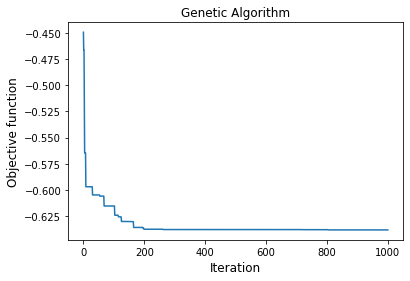

In [24]:
from IPython.display import display, HTML #Para formato HTML

display(HTML('<b>Parámetros del algoritmo genético: </b>'))
display(algorithm_param)

display(HTML('<b>Valor optimo de sharpe ratio: </b>'))
display(abs(best_function))

display(HTML('<b>Variables de decisión como proporción: </b>'))
display(best_variable/np.sum(best_variable))

#Gráfico de proceso de optimización
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(report)
ax.set_title('Genetic Algorithm', fontsize = 12)
ax.set_xlabel('Iteration', fontsize = 12)
ax.set_ylabel('Objective function', fontsize = 12)

---